> predicted=Iris-setosa, actual=Iris-setosa
> predicted=Iris-setosa, actual=Iris-setosa
> predicted=Iris-setosa, actual=Iris-setosa
> predicted=Iris-setosa, actual=Iris-setosa
> predicted=Iris-setosa, actual=Iris-setosa
> predicted=Iris-setosa, actual=Iris-setosa
> predicted=Iris-setosa, actual=Iris-setosa
> predicted=Iris-setosa, actual=Iris-setosa
> predicted=Iris-setosa, actual=Iris-setosa
> predicted=Iris-setosa, actual=Iris-setosa
> predicted=Iris-setosa, actual=Iris-setosa
> predicted=Iris-setosa, actual=Iris-setosa
> predicted=Iris-setosa, actual=Iris-setosa
> predicted=Iris-setosa, actual=Iris-setosa
> predicted=Iris-setosa, actual=Iris-setosa
> predicted=Iris-setosa, actual=Iris-setosa
> predicted=Iris-versicolor, actual=Iris-versicolor
> predicted=Iris-versicolor, actual=Iris-versicolor
> predicted=Iris-versicolor, actual=Iris-versicolor
> predicted=Iris-versicolor, actual=Iris-versicolor
> predicted=Iris-versicolor, actual=Iris-versicolor
> predicted=Iris-versicolor, actual=

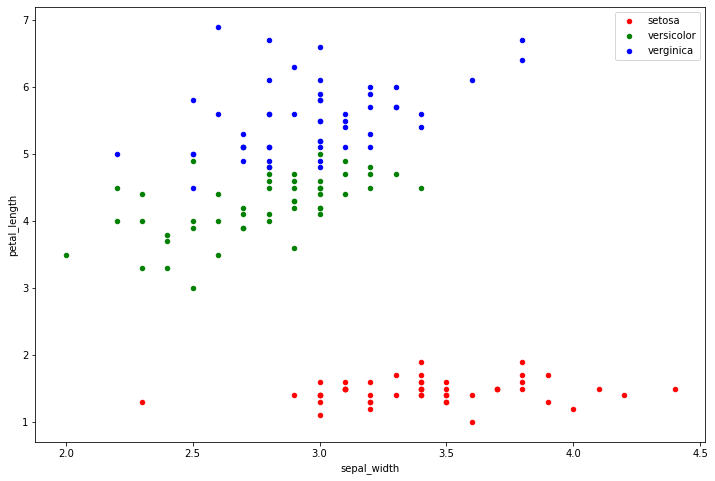

In [7]:
import pandas as pd
import random
import math

#Lee el archivo .csv
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iris_WithHead.csv')
l = df.values.tolist() #lo convertimos a tipo lista


df=df.groupby('class')
df_setosa = df.get_group("Iris-setosa")
df_versicolor = df.get_group("Iris-versicolor")
df_virginica = df.get_group("Iris-virginica")

ax = df_setosa.plot.scatter(x=1,y=2,color = 'red',label = 'setosa')
bx = df_versicolor.plot.scatter(x=1,y=2,color='green',label = 'versicolor',ax=ax)
df_virginica.plot.scatter(x=1,y=2,color='blue',label = 'verginica', figsize=(12, 8),ax=bx)


# Creamos listas vacíaspara el conjunto de test y el conjunto de entrenamiento
test_set = []
training_set = []
approx_training_perc = 0.7 #porcentaje de datos a utilizar para el entrenamiento

# separa, aleatoriamente, un conjunto de instancias como el conjunto entrenamiento
# y el resto, será un conjunto de pruebas

for instance in l: #para cada lista dentro de la lista de listas "l"
  if random.random() < approx_training_perc: #si random < 0.7 agrega esa lista a la lista de listas para el entrenamiento
    training_set.append(instance)
  else: #si no, agrega esa lista a la lista de listas para el testeo
    test_set.append(instance)

# funcion que calcula la distancia euclidiana entre dos instancias
def euclidian_distance(instance1, instance2, n_features):
    dist = 0
    for x in range(n_features):
        dist += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(dist)

''' 
ejemlo de como funciona 'euclidian_distance'
test_instance = l[4]
set_test = l[0]
euclidian_distance(test_instance, set_test,4)

'''
# test_instance = test_set[0]
# test_instance.remove('Iris-setosa')
# print(test_instance)  
# distances = []
# for training_instance in training_set:
#   dist = euclidian_distance(test_instance, training_instance, len(training_instance)-1)
#   distances.append((dist, training_instance))


def get_neighbors(training_set, test_instance, k):
    distances = []
    for training_instance in training_set:
        dist = euclidian_distance(test_instance, training_instance, len(training_instance)-1)
        distances.append((dist, training_instance))
    distances.sort()
    neighbors = []
    for i in range(k): #toma los k vecinos más cercas de la lista de distancias ordenadas
        neighbors.append(distances[i][1])
    return neighbors

 
import operator

def take_decision(neighbors):
    class_votes = {}
    for neighbor in neighbors:
        label = neighbor[-1] #Toma las etiquetas de las instancias
        if label in class_votes: #cuantas las etiquetas que se repiten 
            class_votes[label] += 1
        else:
            class_votes[label] = 1
    sorted_votes = sorted(class_votes.items(), key=operator.itemgetter(1), reverse=True)
    label1 = sorted_votes[0][0]
    neighbor[-1] = label1 
    return label1  #regresa la etiqueta que tuvo más votos

def get_accuracy(test_set, predictions):
    correct = 0
    for test_instance, predicted_value in zip(test_set, predictions):
        if test_instance[-1] is predicted_value:
            correct += 1
    return (correct/float(len(test_set))) * 100.0




k = 3
'''
predictions2 = []
for test_instance in test_set:
  neighbors = get_neighbors(training_set, test_instance,k) #toma los k vecions más cercanos del conjunto training_set de la comparacion de la instancia de del conjunto test_set
  # print('Para la instancia: ')
  # print(test_instance)
  # print('Se predice la etiqueta: ')
  # print(take_decision(neighbors))
  predictions2.append(take_decision(neighbors))
'''
predictions=[]
for instance in test_set:
    neighbors = get_neighbors(training_set, instance, k)
    result = take_decision(neighbors)
    predictions.append(result)
    print('> predicted=' + result + ', actual=' + instance[-1])

print('Accuracy = ',get_accuracy(test_set, predictions))




     sepal_length  sepal_width  petal_length  petal_width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


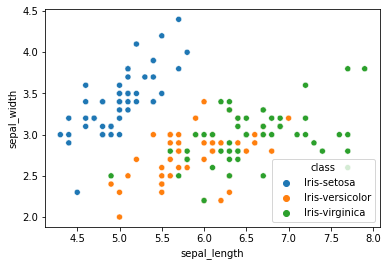

In [23]:


from pandas.plotting import andrews_curves
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iris_WithHead.csv')
print(df)
#sbn.lmplot(x='sepal_width', y='sepal_length',hue='class',data=df)

sbn.scatterplot(x='sepal_length', y='sepal_width',hue='class',data=df)
# Res = pd.DataFrame(predictions)
# print(Res)
# Res=Res.groupby(0)
# Res_setosa = Res.get_group("Iris-setosa")
# Res_versicolor = Res.get_group("Iris-versicolor")
# Res_virginica = Res.get_group("Iris-virginica")

# ax = Res_setosa.plot.line(x='Iris-setosa',y=2,color = 'red',label = 'setosa')
# bx = Res_versicolor.plot.line(x=3,y=2,color='green',label = 'versicolor',ax=ax)
# Res_virginica.plot.line(x=3,y=2,color='blue',label = 'verginica',figsize=(12, 8),ax=bx)
# '''

In [ ]:
andrews_curves(Res,4);

AttributeError: ignored

In [ ]:
print(df)

test_instance = test_set[0]
#test_instance.remove('Iris-setosa')
print(test_instance)  
distances = []
for training_instance in training_set:
  dist = euclidian_distance(test_instance, training_instance, len(training_instance)-1)
  distances.append((dist, training_instance))

print(pd.DataFrame(distances))
test_set

     sepal_length  sepal_width  petal_length  petal_width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]
[4.7, 3.2, 1.3, 0.2, 'Iris-setosa']
            0                                     1


[[4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
 [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
 [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
 [4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
 [5.1, 3.8, 1.5, 0.3, 'Iris-setosa'],
 [5.4, 3.4, 1.7, 0.2, 'Iris-setosa'],
 [4.8, 3.4, 1.9, 0.2, 'Iris-setosa'],
 [5.0, 3.0, 1.6, 0.2, 'Iris-setosa'],
 [5.2, 3.5, 1.5, 0.2, 'Iris-setosa'],
 [4.7, 3.2, 1.6, 0.2, 'Iris-setosa'],
 [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
 [5.0, 3.5, 1.3, 0.3, 'Iris-setosa'],
 [5.0, 3.5, 1.6, 0.6, 'Iris-setosa'],
 [4.6, 3.2, 1.4, 0.2, 'Iris-setosa'],
 [5.3, 3.7, 1.5, 0.2, 'Iris-setosa'],
 [6.5, 2.8, 4.6, 1.5, 'Iris-versicolor'],
 [6.3, 3.3, 4.7, 1.6, 'Iris-versicolor'],
 [5.0, 2.0, 3.5, 1.0, 'Iris-versicolor'],
 [5.9, 3.0, 4.2, 1.5, 'Iris-versicolor'],
 [6.1, 2.9, 4.7, 1.4, 'Iris-versicolor'],
 [5.8, 2.7, 4.1, 1.0, 'Iris-versicolor'],
 [5.9, 3.2, 4.8, 1.8, 'Iris-versicolor'],
 [6.3, 2.5, 4.9, 1.5, 'Iris-versicolor'],
 [6.1, 2.8, 4.7, 1.2, 'Iris-versicolor'],
 [6.8, 2.8, 4.8, 1.4, 'Iris-versicolor'],
 [6.7, 3.0

In [ ]:
def euclidian_distance(instance1, instance2, n_features):
    dist = 0
    for x in range(n_features):
        dist += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(dist)

In [ ]:
import pandas as pd
import random
import math

#Lee el archivo .csv
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iris2.csv')
l = df.values.tolist() #lo convertimos a tipo lista

# Creamos listas vacíaspara el conjunto de test y el conjunto de entrenamiento
test_set = []
training_set = []
approx_training_perc = 0.7 #porcentaje de datos a utilizar para el entrenamiento

# separa, aleatoriamente, un conjunto de instancias como el conjunto entrenamiento
# y el resto, será un conjunto de pruebas
for instance in l:
  if random.random() < approx_training_perc:
    training_set.append(instance)
  else: 
    test_set.append(instance)

# funcion que calcula la distancia euclidiana entre dos instancias
def euclidian_distance(instance1, instance2, n_features):
    dist = 0
    for x in range(n_features):
        dist += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(dist)


# test_instance = test_set[0]
# test_instance.remove('Iris-setosa')
# print(test_instance)  
# distances = []
# for training_instance in training_set:
#   dist = euclidian_distance(test_instance, training_instance, len(training_instance)-1)
#   distances.append((dist, training_instance))


def get_neighbors(training_set, test_instance, k):
    distances = []
    for training_instance in training_set:
        dist = euclidian_distance(test_instance, training_instance, len(training_instance)-1)
        distances.append((dist, training_instance))
    distances.sort()
    neighbors = []
    for i in range(k):
        neighbors.append(distances[i][1])
    return neighbors


import operator
def take_decision(neighbors):
    class_votes = {}
    for neighbor in neighbors:
        label = neighbor[-1]
        if label in class_votes:
            class_votes[label] += 1
        else:
            class_votes[label] = 1
    sorted_votes = sorted(class_votes.items(), key=operator.itemgetter(1), reverse=True)
    return sorted_votes[0][0]

k = 3
predictions2 = []
for test_instance in test_set:
  neighbors = get_neighbors(training_set, test_instance,k)
  # print('Para la instancia: ')
  # print(test_instance)
  # print('Se predice la etiqueta: ')
  # print(take_decision(neighbors))
  predictions2.append(take_decision(neighbors))

# print(predictions)


def get_accuracy(test_set, predictions):
    correct = 0
    for test_instance, predicted_value in zip(test_set, predictions):
        if test_instance[-1] is predicted_value:
            correct += 1
    return (correct/float(len(test_set))) * 100.0

print(training_set)
predictions=[]
for instance in test_set:
    neighbors = get_neighbors(training_set, instance, k)
    print(neighbors)
    result = take_decision(neighbors)
    predictions.append(result)
    #print('> predicted=' + result + ', actual=' + instance[-1])

#print('Accuracy = ',get_accuracy(test_set, predictions2))




[[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'], [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'], [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'], [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'], [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'], [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'], [5.4, 3.7, 1.5, 0.2, 'Iris-setosa'], [4.8, 3.4, 1.6, 0.2, 'Iris-setosa'], [4.8, 3.0, 1.4, 0.1, 'Iris-setosa'], [4.3, 3.0, 1.1, 0.1, 'Iris-setosa'], [5.8, 4.0, 1.2, 0.2, 'Iris-setosa'], [5.7, 4.4, 1.5, 0.4, 'Iris-setosa'], [5.1, 3.5, 1.4, 0.3, 'Iris-setosa'], [5.1, 3.8, 1.5, 0.3, 'Iris-setosa'], [5.4, 3.4, 1.7, 0.2, 'Iris-setosa'], [4.6, 3.6, 1.0, 0.2, 'Iris-setosa'], [5.1, 3.3, 1.7, 0.5, 'Iris-setosa'], [5.0, 3.0, 1.6, 0.2, 'Iris-setosa'], [5.2, 3.5, 1.5, 0.2, 'Iris-setosa'], [5.2, 3.4, 1.4, 0.2, 'Iris-setosa'], [4.7, 3.2, 1.6, 0.2, 'Iris-setosa'], [4.8, 3.1, 1.6, 0.2, 'Iris-setosa'], [5.4, 3.4, 1.5, 0.4, 'Iris-setosa'], [5.5, 4.2, 1.4, 0.2, 'Iris-setosa'], [5.0, 3.2, 1.2, 0.2, 'Iris-setosa'], [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'], [5.0, 3.5, 1.3, 0.3, 'Iris-setosa'], 

In [ ]:
training_set
instance

[5.8, 2.7, 5.1, 1.9, 'Iris-virginica']

In [ ]:
import pandas as pd
import random
import math

#Lee el archivo .csv
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iris2.csv')
l = df.values.tolist() #lo convertimos a tipo lista

# Creamos listas vacíaspara el conjunto de test y el conjunto de entrenamiento
test_set = []
training_set = []
approx_training_perc = 0.7 #porcentaje de datos a utilizar para el entrenamiento

# separa, aleatoriamente, un conjunto de instancias como el conjunto entrenamiento
# y el resto, será un conjunto de pruebas
for instance in l:
  if random.random() < approx_training_perc:
    training_set.append(instance)
  else: 
    test_set.append(instance)

# funcion que calcula la distancia euclidiana entre dos instancias
def euclidian_distance(instance1, instance2, n_features):
    dist = 0
    for x in range(n_features):
        dist += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(dist)


# test_instance = test_set[0]
# test_instance.remove('Iris-setosa')
# print(test_instance)  
# distances = []
# for training_instance in training_set:
#   dist = euclidian_distance(test_instance, training_instance, len(training_instance)-1)
#   distances.append((dist, training_instance))


def get_neighbors(training_set, test_instance, k):
    distances = []
    for training_instance in training_set:
        dist = euclidian_distance(test_instance, training_instance, len(training_instance)-1)
        distances.append((dist, training_instance))
    distances.sort()
    neighbors = []
    for i in range(k):
        neighbors.append(distances[i][1])
    return neighbors


import operator
def take_decision(neighbors):
    class_votes = {}
    for neighbor in neighbors:
        label = neighbor[-1]
        if label in class_votes:
            class_votes[label] += 1
        else:
            class_votes[label] = 1
    sorted_votes = sorted(class_votes.items(), key=operator.itemgetter(1), reverse=True)
    return sorted_votes[0][0]

k = 3
predictions2 = []
for test_instance in test_set:
  neighbors = get_neighbors(training_set, test_instance,k)
  # print('Para la instancia: ')
  # print(test_instance)
  # print('Se predice la etiqueta: ')
  # print(take_decision(neighbors))
  predictions2.append(take_decision(neighbors))

# print(predictions)


def get_accuracy(test_set, predictions):
    correct = 0
    for test_instance, predicted_value in zip(test_set, predictions):
        if test_instance[-1] is predicted_value:
            correct += 1
    return (correct/float(len(test_set))) * 100.0


predictions=[]
for instance in test_set:
    neighbors = get_neighbors(training_set, instance, k)
    result = take_decision(neighbors)
    predictions.append(result)
    #print('> predicted=' + result + ', actual=' + instance[-1])

print('Accuracy = ',get_accuracy(test_set, predictions2))




Accuracy =  93.02325581395348


In [ ]:
import pandas as pd
import random
import math

#Lee el archivo .csv
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iris2.csv')
l = df.values.tolist() #lo convertimos a tipo lista

# Creamos listas vacíaspara el conjunto de test y el conjunto de entrenamiento
test_set = []
training_set = []
approx_training_perc = 0.7 #porcentaje de datos a utilizar para el entrenamiento

# separa, aleatoriamente, un conjunto de instancias como el conjunto entrenamiento
# y el resto, será un conjunto de pruebas
for instance in l:
  if random.random() < approx_training_perc:
    training_set.append(instance)
  else: 
    test_set.append(instance)

# funcion que calcula la distancia euclidiana entre dos instancias
def euclidian_distance(instance1, instance2, n_features):
    dist = 0
    for x in range(n_features):
        dist += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(dist)


# test_instance = test_set[0]
# test_instance.remove('Iris-setosa')
# print(test_instance)  
# distances = []
# for training_instance in training_set:
#   dist = euclidian_distance(test_instance, training_instance, len(training_instance)-1)
#   distances.append((dist, training_instance))


def get_neighbors(training_set, test_instance, k):
    distances = []
    for training_instance in training_set:
        dist = euclidian_distance(test_instance, training_instance, len(training_instance)-1)
        distances.append((dist, training_instance))
    distances.sort()
    neighbors = []
    for i in range(k):
        neighbors.append(distances[i][1])
    return neighbors


import operator
def take_decision(neighbors):
    class_votes = {}
    for neighbor in neighbors:
        label = neighbor[-1]
        if label in class_votes:
            class_votes[label] += 1
        else:
            class_votes[label] = 1
    sorted_votes = sorted(class_votes.items(), key=operator.itemgetter(1), reverse=True)
    return sorted_votes[0][0]

k = 3
predictions2 = []
for test_instance in test_set:
  neighbors = get_neighbors(training_set, test_instance,k)
  # print('Para la instancia: ')
  # print(test_instance)
  # print('Se predice la etiqueta: ')
  # print(take_decision(neighbors))
  predictions2.append(take_decision(neighbors))

# print(predictions)


def get_accuracy(test_set, predictions):
    correct = 0
    for test_instance, predicted_value in zip(test_set, predictions):
        if test_instance[-1] is predicted_value:
            correct += 1
    return (correct/float(len(test_set))) * 100.0


predictions=[]
for instance in test_set:
    neighbors = get_neighbors(training_set, instance, k)
    result = take_decision(neighbors)
    predictions.append(result)
    #print('> predicted=' + result + ', actual=' + instance[-1])

print('Accuracy = ',get_accuracy(test_set, predictions2))




Accuracy =  93.02325581395348


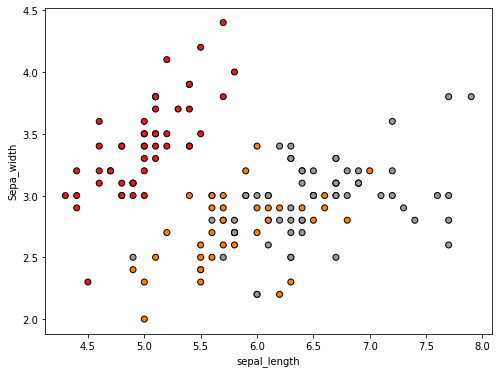

In [ ]:
import matplotlib.pyplot as plt
plt.figure(1, figsize=(8,6))
plt.clf
plt.xlabel('sepal_length')
plt.ylabel('Sepa_width')
df = pd.read_csv('iris3.csv', header=None)
df[4] = df[4].replace('Iris-setosa',0)
df[4] = df[4].replace('Iris-versicolor',1)
df[4] = df[4].replace('Iris-virginica',2)

plt.scatter(df[0], df[1], c=df[4], cmap=plt.cm.Set1, edgecolor='k')



In [ ]:
# funcion que lee el conjunto de datos desde un archivo csv y lo divide en el conjunto de prueba y conjunto entrenamiento
import pandas as pd
import random

def load_and_split_dataset(filename, approx_training_perc = 0.6):
    # lee el conjunto de datos Iris en un dataframe
    df = pd.read_csv(filename, header=None)
    # convierte el dataframe en una lista de listas
    l = df.values.tolist()
    # separa, aleatoriamente, un conjunto de instancias como el conjunto entrenamiento
    # y el resto, será un conjunto de pruebas
    training_set = []
    test_set = []
    for instance in l:
        if random.random() < approx_training_perc:
            training_set.append(instance)
        else:
            test_set.append(instance)
    return (training_set, test_set)

# funcion que calcula la distancia euclidiana entre dos instancias
import math
def euclidian_distance(instance1, instance2, n_features):
    dist = 0
    for x in range(n_features):
        dist += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(dist)

# obtiene los K vecinos mas cercanos
def get_neighbors(training_set, test_instance, k):
    distances = []
    for training_instance in training_set:
        dist = euclidian_distance(test_instance, training_instance, len(training_instance)-1)
        distances.append((dist, training_instance))
    distances.sort()
    neighbors = []
    for i in range(k):
        neighbors.append(distances[i][1])
    return neighbors

# toma la decision con base al vecindario
import operator
def take_decision(neighbors):
    class_votes = {}
    for neighbor in neighbors:
        label = neighbor[-1]
        if label in class_votes:
            class_votes[label] += 1
        else:
            class_votes[label] = 1
    sorted_votes = sorted(class_votes.items(), key=operator.itemgetter(1), reverse=True)
    return sorted_votes[0][0]

def get_accuracy(test_set, predictions):
    correct = 0
    for test_instance, predicted_value in zip(test_set, predictions):
        if test_instance[-1] is predicted_value:
            correct += 1
    return (correct/float(len(test_set))) * 100.0

# lee conjunto de datos Iris
(training_set, test_set) = load_and_split_dataset('iris.data', .6)
# genera predicciones
predictions=[]
k = 3
for instance in test_set:
    neighbors = get_neighbors(training_set, instance, k)
    result = take_decision(neighbors)
    predictions.append(result)
    print('> predicted=' + result + ', actual=' + instance[-1])

accuracy = get_accuracy(test_set, predictions)
print('Accuracy: ' + str(accuracy) + '%')


# para dibujar
import matplotlib.pyplot as plt
df = pd.read_csv('iris.data', header=None)
plt.figure(1, figsize=(8, 6)) # una figura con tamaño de 8 x 6
plt.clf() # clear figure

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

df[4] = df[4].replace('Iris-setosa',0)
df[4] = df[4].replace('Iris-versicolor',1)
df[4] = df[4].replace('Iris-virginica',2)
plt.scatter(df[0], df[1], c=df[4], cmap=plt.cm.Set1, edgecolor='k')

plt.show()

FileNotFoundError: ignored